In [124]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [125]:
dataDir='.'
# dataType='val2017'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [126]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=11.48s)
creating index...
index created!


In [25]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
print(len(cats))
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

80
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
vehicle indoor appliance accessory person sports food electronic animal furniture outdoor kitchen


In [43]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
print(imgIds)
imgIds = coco.getImgIds(imgIds = [379520])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[379520, 55809, 46978, 438915, 500100, 209028, 89350, 341623, 306440, 76937, 372874, 22796, 282768, 360595, 366484, 410005, 172310, 449560, 557721, 22427, 365340, 363549, 354721, 47909, 125351, 312233, 28842, 304173, 241837, 560561, 88754, 429236, 536244, 380724, 55478, 23737, 377278, 411583, 476736, 461632, 463044, 569158, 102599, 231240, 296782, 48595, 558036, 518613, 441470, 493020, 297692, 162396, 547421, 176229, 392166, 251368, 255209, 353644, 155117, 551795, 556149, 45175, 568187, 158718, 575615]


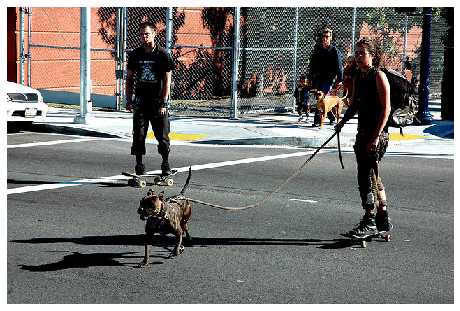

In [44]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

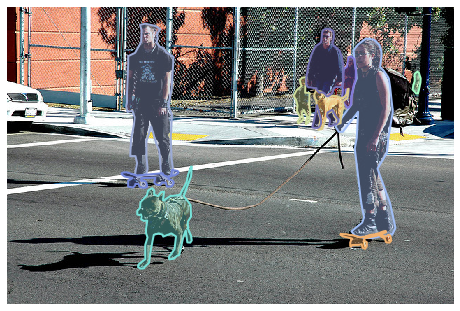

In [53]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [46]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=5.08s)
creating index...
index created!


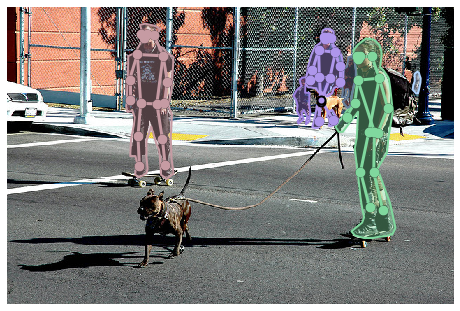

In [47]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [48]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


A person walking a dog on a leash down a street.
THIS IS A GIRL ON A SKATEBOARD WALKING HER PIT BULL
a person that is walking a dog down the street
A person riding on their skateboard while walking their dog.
Her pit bull takes the lead when she is on her skateboard.


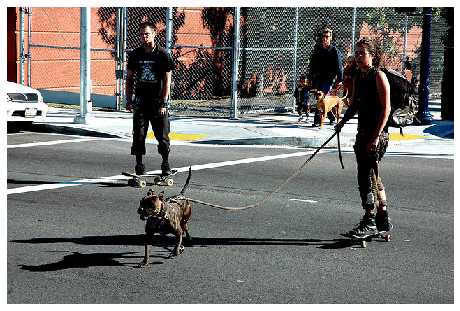

In [49]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
# print(len(anns))
plt.imshow(I); plt.axis('off'); plt.show()

category IDs:[1, 18, 41]
image Id length:65
image Ids:[379520]
image info:{'license': 3, 'file_name': '000000379520.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000379520.jpg', 'height': 426, 'width': 640, 'date_captured': '2013-11-14 20:25:13', 'flickr_url': 'http://farm3.staticflickr.com/2240/1602247464_66512b7ea1_z.jpg', 'id': 379520}
annotation Ids:[12877, 227350, 235685, 238246, 258701, 640878, 641899, 1235719, 1402617, 1739044]
annotation infos:{'segmentation': [[196.37, 372.96, 202.83, 366.86, 204.98, 350.37, 209.64, 326.7, 216.46, 324.55, 222.19, 326.34, 223.27, 329.21, 234.75, 324.55, 241.56, 328.85, 239.41, 347.14, 231.16, 358.61, 231.88, 361.84, 238.69, 360.77, 242.64, 356.82, 246.22, 355.39, 251.6, 331.36, 255.55, 320.24, 256.62, 328.49, 257.7, 337.46, 262.0, 337.81, 264.15, 334.59, 263.08, 327.77, 258.77, 318.09, 258.41, 307.69, 263.08, 300.52, 262.36, 284.02, 257.7, 277.57, 252.68, 271.11, 257.7, 256.77, 263.08, 243.14, 264.15, 228.79, 263.08, 228.79, 258

(-0.5, 639.5, 425.5, -0.5)

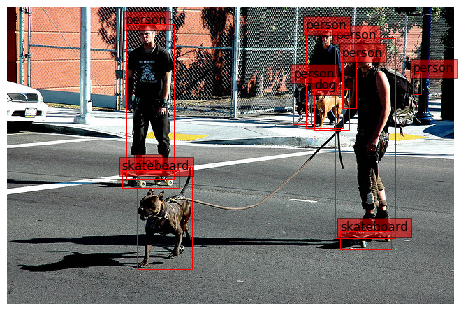

In [123]:
import matplotlib.patches as patches
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard']);
print('category IDs:{}'.format(catIds))
imgIds = coco.getImgIds(catIds=catIds);
print('image Id length:{}'.format(len(imgIds)))
imgIds = coco.getImgIds(imgIds = [imgIds[0]])
print('image Ids:{}'.format(imgIds))
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print('image info:{}'.format(img))

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print('annotation Ids:{}'.format(annIds))
anns = coco.loadAnns(annIds)
print('annotation infos:{}'.format(anns[0]))

cats = coco.loadCats(coco.getCatIds())
nms  = [cat['name'] for cat in cats]

fig,ax = plt.subplots(1)
ax.imshow(I)
for ann in anns:
    bb = ann['bbox']
    cat = coco.loadCats(ann['category_id'])[0]['name']
#     cat = cats[ann['category_id']+1]['name']
    rect = patches.Rectangle((bb[0],bb[1]),bb[2],bb[3],linewidth=1,edgecolor='r',facecolor='none')
    ax.text(bb[0], bb[1], cat, fontsize=12, 
            bbox={'facecolor': 'red', 'alpha':0.5, 'pad':3})
    ax.add_patch(rect)
ax.axis('off')